In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('random_sales_data.csv',  parse_dates = ['date'], index_col = ['date'])
df.head()

,sales
date,
2020-01-01,252
2020-02-01,332
2020-03-01,227
2020-04-01,293
2020-05-01,238


In [6]:
## rule = 'MS' for monthly ; start of the month
df_ms = df.resample(rule = 'MS').sum()
df_ms

,sales
date,
2020-01-01,14070
2020-02-01,12650
2020-03-01,13167
2020-04-01,17276
2020-05-01,18527
2020-06-01,17421
2020-07-01,23068
2020-08-01,22757
2020-09-01,22171


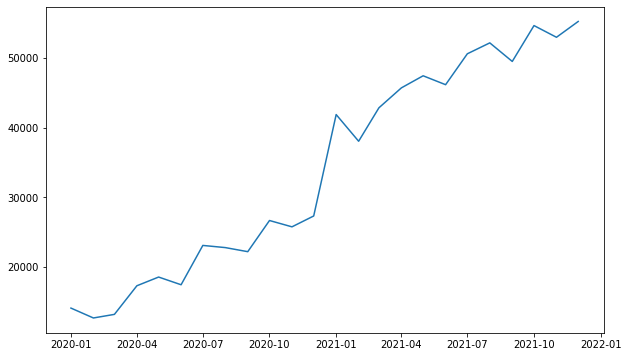

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df_ms.index, df_ms['sales'])

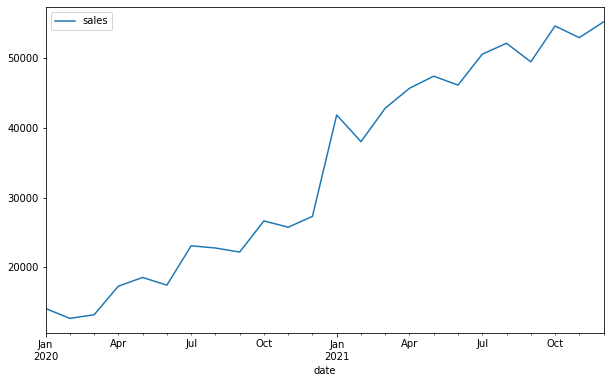

In [13]:
df_ms.plot(figsize=(10,6))
plt.show()

In [17]:
import statsmodels.api as sm
ssnl_decomposition = sm.tsa.seasonal_decompose(df_ms, model = 'additive')
ssnl_decomposition

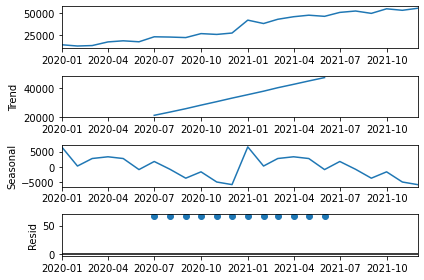

In [18]:
fig = ssnl_decomposition.plot()
plt.show()

### Trend : Forward (Increasing)
### Seasonal 

In [19]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_ms)
adf_test

(-0.5136631014448463,
 0.8893225428674953,
 1,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 274.14809194286295)

In [21]:
type(adf_test)

tuple

In [25]:
adf_test[1]

0.8893225428674953

In [27]:
print(f"p-value from adfuller test is = {adf_test[1]}")

p-value from adfuller test is = 0.8893225428674953


In [28]:
# split data into train and test

In [30]:
len(df_ms)

24

In [31]:
s_train = df_ms[:20]
s_test = df_ms[20:]

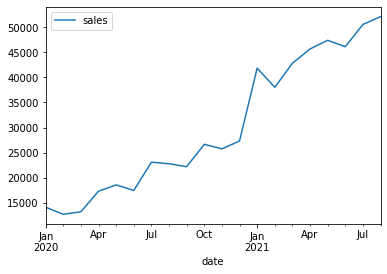

In [32]:
s_train.plot()

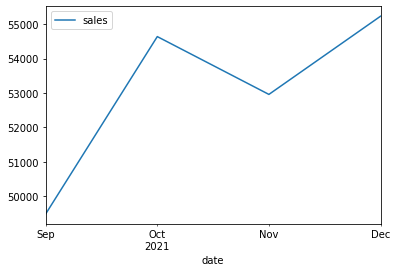

In [33]:
s_test.plot()

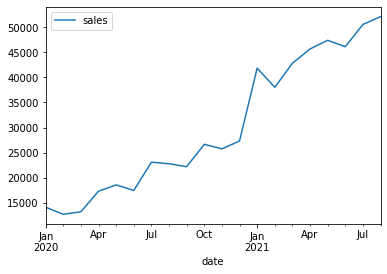

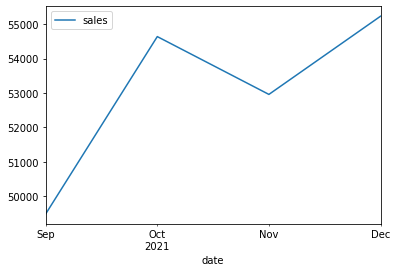

In [34]:
s_train.plot()
s_test.plot()

## ARIMA Model:
ARIMA(train_dataset, order = (p,d,q)).fit()

Here p,d,q are Hyper-Parameters of ARIMA Model.

ARIMA model works the best for 'Stationary', 'Non-Seasonal' series dataset.

## Methods to find Hyper-Parameters(p,d,q):
1. ACF & PACF Plots.
2. Auto-ARIMA function.
3. Custom for loop (least_squared_error based) 

### 1. ACF & PACF Plots:

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

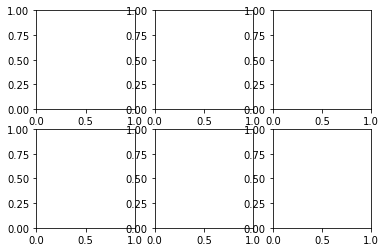

In [36]:
fig, axes = plt.subplots(2,3)

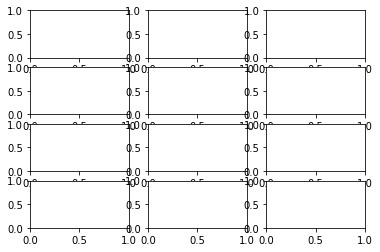

In [37]:
fig, axes = plt.subplots(4,3)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 11.

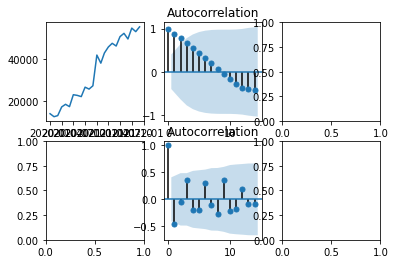

In [49]:
fig, axes = plt.subplots(2,3)
axes[0,0].plot(df_ms)
plot_acf(df_ms, ax=axes[0,1])
plot_acf(df_ms.diff().dropna(), ax=axes[1,1])

# axes[1,0].plot(df_ms)
plot_pacf(df_ms.diff().dropna(), ax=axes[1,1])
# plot_pacf(df_ms.dropna(), ax=axes[1,2])
plt.show()

### 2. Auto-ARIMA:

In [54]:
## import pmdarima
    
# ModuleNotFoundError: No module named 'pmdarima'

In [57]:
# pip install pmdarima

In [58]:
# from pmdarima import auto_arima
# auto_arima(s_train, m = 12, start_p=0, seasonal=True, d=1, trace=True, supress_warnings=True, error_action='ignore', stepwise=True)

### 3. Custom for loop:

In [59]:
import itertools

In [61]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [62]:
pdq_combinations = list(itertools.product(p,d,q))
len(pdq_combinations)

128

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
rsme = []
order_list = []

for pdq in pdq_combinations:
    try:
        model = ARIMA(df_ms, order=pdq).fit()
        prediction = model.predict(start=len(s_train), end=(len(df_ms)-1))
        error = np.sqrt(mean_squqred_error(s_test, prediction))
        order_list.append(pdq)
        rsme.append(error)
    except:
        continue

# results = pd.DataFrame(index = order_list, data = rsme, column = ['RMSE'])
# results

result_dict = {'order': order_list, 'rsme': rsme}
# results = pd.DataFrame(index = order_list, data = rsme, column = ['RMSE'])

results_df = pd.DataFrame(result_dict)
results_df

/home/vins/virtenv/py_dev/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/vins/virtenv/py_dev/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_p

/home/vins/virtenv/py_dev/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/vins/virtenv/py_dev/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/vins/virtenv/py_dev/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/vins/virtenv/py_dev/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/vins/virtenv/py_dev/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', 

,order,rsme


In [67]:
result_dict = {'order': order_list, 'rsme': rsme}
# results = pd.DataFrame(index = order_list, data = rsme, column = ['RMSE'])

results_df = pd.DataFrame(result_dict)
results_df

,order,rsme
